In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import random

import json
import os


# Data info.# Data  

width = 640
height = 480
channel = 3


# resize
r_w = 512
r_h = 512

total_pix = r_w * r_h * channel

def data_process(d_dir, split_rate):
    
    num_class = len(d_dir.keys())

    out = {}
    

    for i in range(num_class):
        x_train, x_test = train_test_split(d_dir[i], test_size=split_rate)
        
        if i == 0:
            train_temp = x_train
            test_temp = x_test
        else:
            train_temp.extend(x_train)
            test_temp.extend(x_test)
    
    random.shuffle(train_temp)
    out['train'] = train_temp
    random.shuffle(test_temp)
    out['test'] = test_temp
    
    return out

image_dir1 = 'D:\\dataset_full\\'
class_name1 = ['Untorn', 'Torn']

data_dir1 = {}
for i in range(len(class_name1)):
    temp_dir = image_dir1 + class_name1[i]
    img_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.png')]
    data_dir1[i] = img_files
print(len(data_dir1[0]), len(data_dir1[1]))

2136 2427


In [35]:
img = cv2.imread(data_dir1[0][642])
#img = cv2.imread('D:\\dataset_full\\Untorn\\Untorn (1).png')

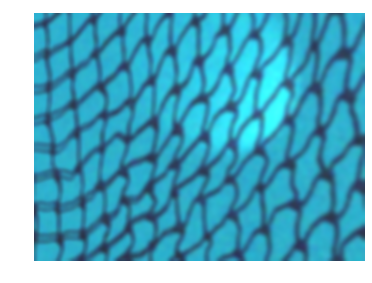

In [36]:
blur = cv2.GaussianBlur(img, (11,11), 7,7)
plt.axis("off")
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

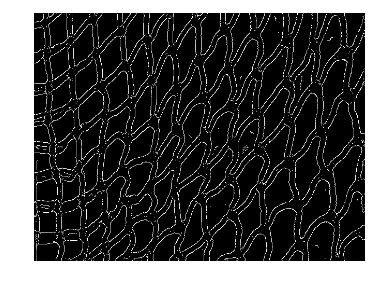

In [37]:
edges = cv2.Canny(blur, 20, 5)
plt.axis("off")
plt.imshow(edges, cmap="gray")
plt.show()

#cv2.imwrite(filename, edges)

In [ ]:
print(data_dir1[0][0])
save_dir1 = data_dir1[0][0][0:15]
save_dir2 = '_edge'
save_dir3 = data_dir1[0][0][15:]
save_dir = save_dir1 + save_dir2 + save_dir3
print(save_dir)

In [38]:
for i in range(2):
    for j in range(len(data_dir1[i])):
        save_dir1 = data_dir1[i][j][0:15]
        save_dir2 = '_edge'
        save_dir3 = data_dir1[i][j][15:]
        save_dir = save_dir1 + save_dir2 + save_dir3

        img = cv2.imread(data_dir1[i][j])
        blur = cv2.GaussianBlur(img, (11,11), 7,7)
        edges = cv2.Canny(blur, 20, 5)
        
        cv2.imwrite(save_dir, edges)
        